In [1]:
library(ape)


tree <- read.tree("~/workspace/genome_data/annotations/s_aureus/gene_sequences/essb_gene/tree.nwk")
tree


Phylogenetic tree with 497 tips and 496 internal nodes.

Tip labels:
  AH20K016, AH19E059, AH19H057, ALF22J055, AH21J034, ALF22C126, ...

Rooted; includes branch length(s).

In [2]:
library(data.table)


pheno <- fread("/home/vmadmin/workspace/ehr_data/data/full_cohort/tube_id_mortality.pheno", data.table = FALSE)
pheno_vector <- setNames(pheno$death_30_day, pheno$tube_code)
pheno_vector

AH19I003  AH21E085 ALF22B136  AH20B011 ALF23D002  AH21H067  AH19H079  AH20H033 
        0         0         0         0         0         0         0         0 
 AH22A034  AH21G070  AH20B042  AH19H073  AH19G065  AH20I016  AH19K042  AH21A081 
        0         0         0         0         0         0         0         0 
ALF22L085  AH21C049  AH19H033  AH21G058  AH21K008  AH22A036 ALF23C169  AH21E065 
        0         0         0         0         0         0         0         0 
 AH21H066  AH21J039 ALF22E016  AH21I025   KPN1956 ALF22B032  AH21L121 ALF23C052 
        0         0         0         0         0         0         0         1 
 AH21E052 ALF22G030 ALF22G080  AH21K025 ALF23A050 ALF23A051 ALF23B068  AH20K052 
        0         0         1         0         0         0         0         0 
 AH21I046  AH21I051  AH21I091 ALF22C048 ALF22D043 ALF22L150 ALF23A135  AH21I029 
        0         0         0         0         0         0         0         0 
 AH21L060 ALF22E077  AH21L124 ALF23B110 ALF22H033  AH20I033  AH20I034  AH20I035 
        0         1         0         0         0         0         0         0 
ALF22D097  AH20I005 ALF22B049  AH20J009  AH21B002   KPN2214  AH20A043  AH21G065 
        0         0         0         0         1         0         0         0 
 AH21I079  AH21E048  AH18J038 ALF22I001  AH21K006  AH21K007 ALF22F150  AH20A009 
        0         0         1         0         0         0         0         0 
 AH20A010 ALF22K049  AH18J074  AH22A005 ALF22F007 ALF23C126 ALF23C127  AH19I053 
        0         0         0         0         0         0         0         0 
 AH22A149  AH21B118 ALF22F167  AH19L006 ALF22L136  AH20A058 ALF22H066  AH21K089 
        0         0         0         0         0         0         0         0 
 AH19K059 ALF22J074  AH18J019  AH19J067 ALF22K137  AH21G023  AH20C008 ALF23B001 
        0         0         0         0         0         1         0         0 
 AH20B070  AH21H017  AH21I015  AH21J013  AH20H014 ALF22K050  AH20B012 ALF22G152 
        1         0         1         0         0         0         0         1 
 AH20G072  AH19H056  AH19H057  AH20F030  AH19H010 ALF22L090 ALF22H038  AH18J066 
        0         0         0         0         0         1         0         0 
 AH20B064  AH20L018  AH21G024  AH19K005  AH21L073 ALF22I092  AH21H055  AH20G075 
        0         0         0         0         1         0         0         0 
 AH21D051  AH21B148 ALF22H061  AH20J001  AH18J082 ALF22E083  AH19I063 ALF22F113 
        0         0         0         0         0         0         0         1 
 AH21G053 ALF23A134 ALF22E055  AH20A054  AH18J052  AH20H050 ALF23A009   KPN2153 
        0         0         0         0         0         0         0         0 
ALF22I128 ALF22H131  AH20B014  AH21A022  AH21A083  AH19C004 ALF23C089  AH20D057 
        0         0         0         0         0         0         0         0 
ALF22L144  AH19J022 ALF22I124 ALF22J016  AH20K047  AH21C064  AH21I027  AH20J052 
        0         0         0         0         0         0         0         0 
ALF22J077  AH21G019 ALF22C121  AH21G056  AH21I070  AH20H048 ALF22L134 ALF22K051 
        0         0         0         0         0         0         0         0 
ALF22L068  AH21E004  AH21I076  AH19L016  AH21J072 ALF22F126 ALF23A076 ALF22C012 
        0         0         0         0         0         0         0         0 
ALF22D093 ALF22G173 ALF23B065   KPN1974  AH19F058  AH20L058 ALF23C074 ALF22D046 
        0         0         0         0         0         1         0         0 
 AH21K015  AH20L069 ALF22L151 ALF23B007 ALF22J027  AH21K003 ALF22F078  AH19I020 
        0         0         0         0         0         0         0         0 
 AH19B003  AH20B073  AH19H020 ALF22C081  AH20B082  AH20E034  AH20F038  AH20I048 
        0         1         0         0         0         0         0         0 
 AH20K039   KPN2022 ALF22F047 ALF22I143  AH21G069  AH20E012  AH20I057  AH21C022 
        0         0         0   

In [3]:
library(vcfR)
library(adegenet)
library(data.table)


vcf <- read.vcfR("~/workspace/genome_data/annotations/s_aureus/gene_sequences/essb_gene/variants.vcf")
genlight_obj <- vcfR2genlight(vcf)
snp_matrix <- as.matrix(genlight_obj)
snp_matrix[is.na(snp_matrix)] <- NA
snp_df <- data.frame(SampleID = indNames(genlight_obj), snp_matrix, check.names = FALSE)
rownames(snp_df) <- snp_df[, 1]
snps <- snp_df[, -1]


   *****       ***   vcfR   ***       *****
   This is vcfR 1.15.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****


Loading required package: ade4


   /// adegenet 2.1.11 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()





Scanning file to determine attributes.
File attributes:
  meta lines: 3
  header_line: 4
  variant count: 136
  column count: 506
Meta line 3 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 136
  Character matrix gt cols: 506
  skip: 0
  nrows: 136
  row_num: 0
Processed variant: 136
All variants processed


Warning message in vcfR2genlight(vcf):
“Found 73 loci with more than two alleles.
Objects of class genlight only support loci with two alleles.
73 loci will be omitted from the genlight object.”


In [4]:
common_samples <- Reduce(intersect, list(tree$tip.label, rownames(snps), names(pheno_vector)))

In [5]:
tree <- keep.tip(tree, common_samples)
snps <- snps[common_samples, ]
pheno_vector <- pheno_vector[common_samples]


Attaching package: ‘treeWAS’


The following objects are masked _by_ ‘.GlobalEnv’:

    snps, tree




Setting 11 negative branch lengths to zero.
[1] "treeWAS snps sim done @ 2025-07-24 05:06:08.985084"
[1] "Reconstructions completed @ 2025-07-24 05:06:09.163669"
[1] "Started running terminal test @ 2025-07-24 05:06:09.164075"
[1] "Real data scores completed for terminal test @ 2025-07-24 05:06:09.169955"
[1] "Simulated data scores completed for terminal test @ 2025-07-24 05:06:09.172356"
[1] "Started running simultaneous test @ 2025-07-24 05:06:09.172561"
[1] "Real data scores completed for simultaneous test @ 2025-07-24 05:06:09.173474"
[1] "Simulated data scores completed for simultaneous test @ 2025-07-24 05:06:09.175857"
[1] "Started running subsequent test @ 2025-07-24 05:06:09.176038"
[1] "Real data scores completed for subsequent test @ 2025-07-24 05:06:09.177306"
[1] "Simulated data scores completed for subsequent test @ 2025-07-24 05:06:09.185955"
[1] "Finished running terminal test @ 2025-07-24 05:06:09.194544"
[1] "Finished running simultaneous test @ 2025-07-24 05:06:09.19

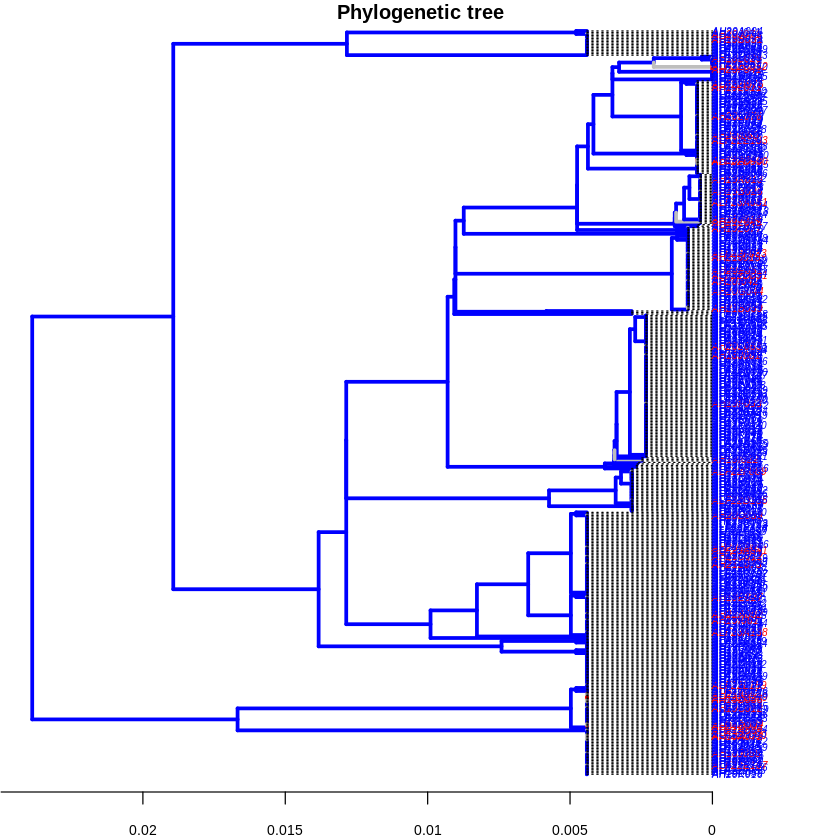

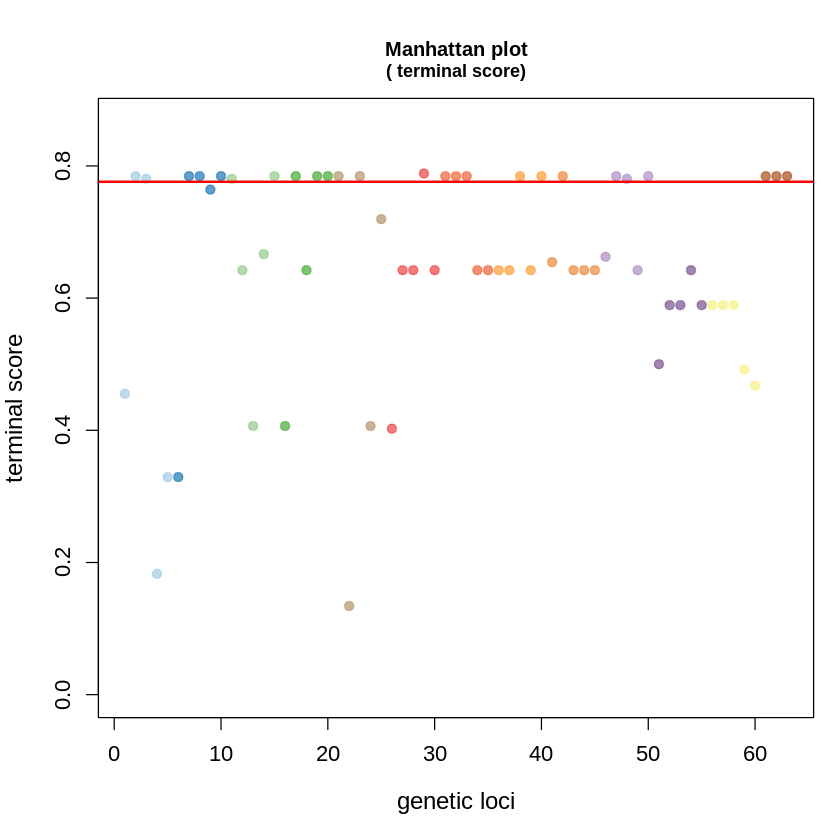

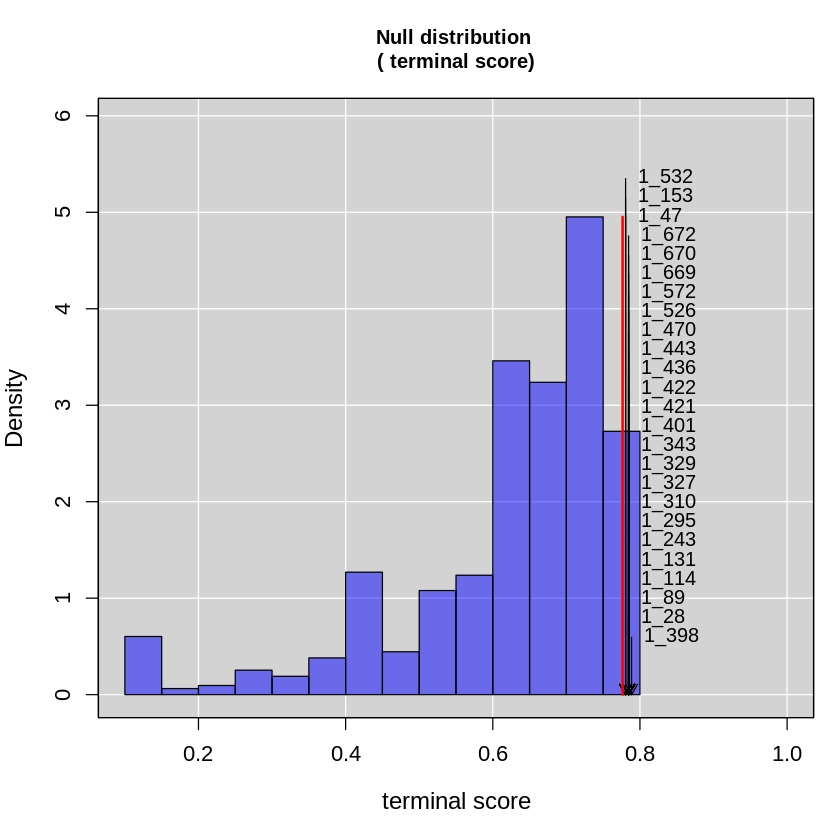

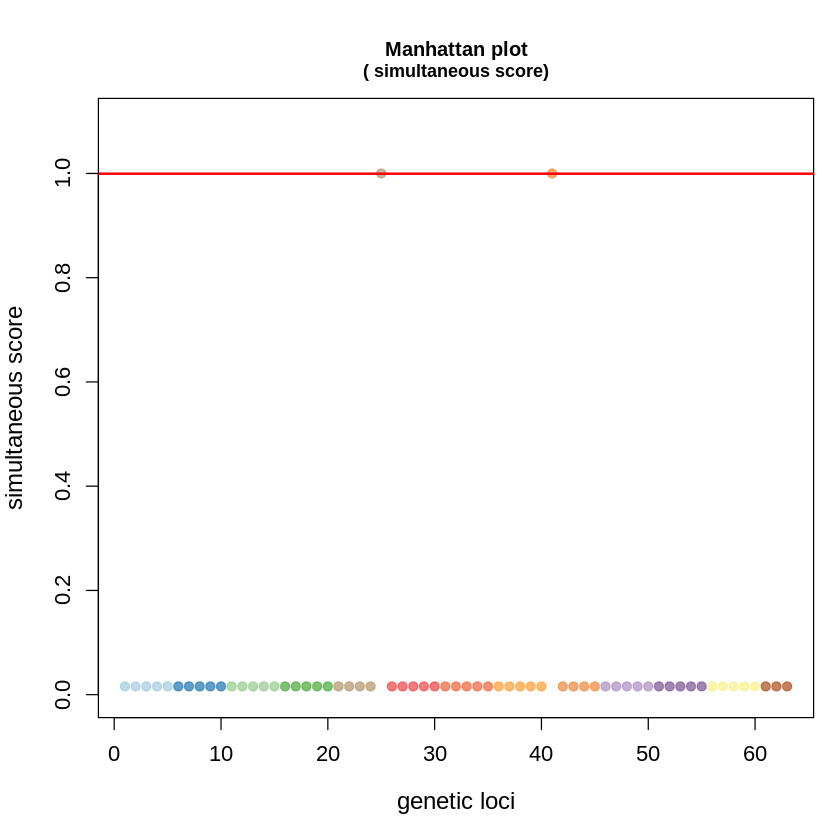

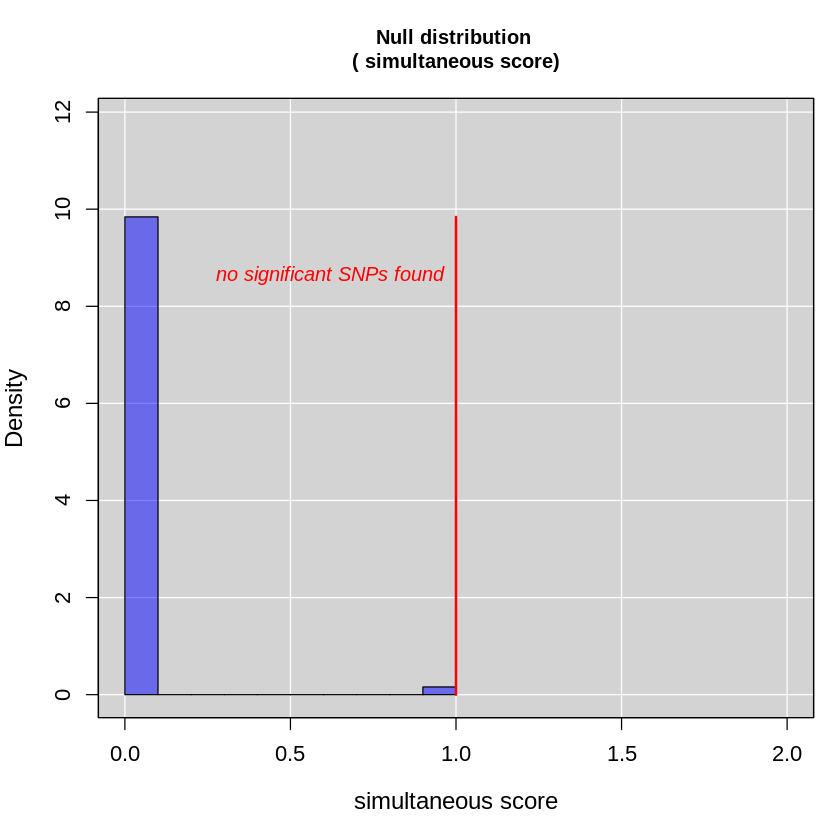

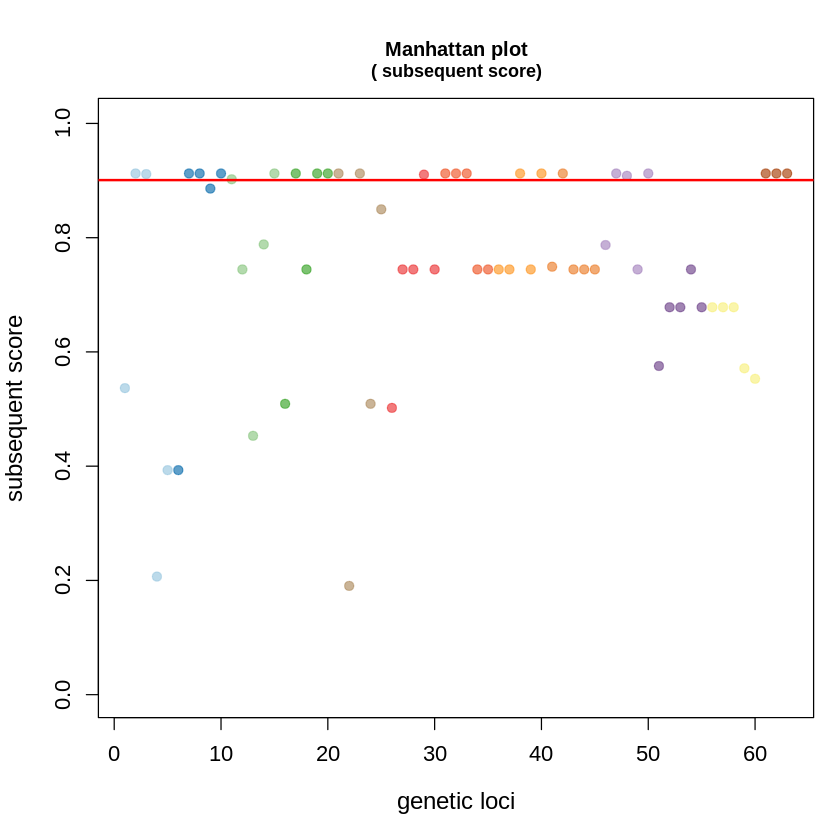

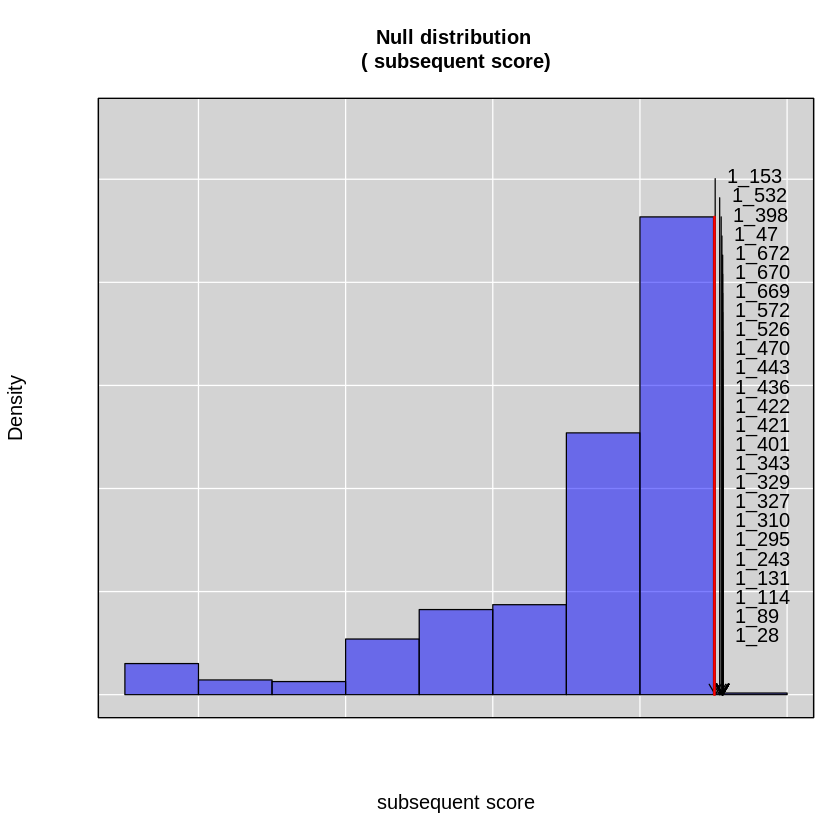

In [6]:
library(treeWAS)


par(bg = "white")
tw_result <- treeWAS(snps = snps,
                     phen = pheno_vector,
                     tree = tree,
                     p.value.correct = "fdr")

In [8]:
tw_result$terminal$min.p.value

p-values listed as 0 are less than: 
                        0.001587302

In [9]:
library(dplyr)


tw_result$terminal$sig.snps %>%
  mutate(odds_ratio = ((G1P1 + 0.5) * (G0P0 + 0.5)) / ((G0P1 + 0.5) * (G1P0 + 0.5)))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following object is masked from ‘package:ape’:

    where


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,SNP.locus,p.value,score,G1P1,G0P0,G1P0,G0P1,odds_ratio
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1_398,29,0,0.7886179,1,439,1,51,8.533981
1_28,2,0,0.7845528,0,439,1,52,2.790476
1_89,7,0,0.7845528,0,439,1,52,2.790476
1_114,8,0,0.7845528,0,439,1,52,2.790476
1_131,10,0,0.7845528,0,439,1,52,2.790476
1_243,15,0,0.7845528,0,439,1,52,2.790476
1_295,17,0,0.7845528,0,439,1,52,2.790476
1_310,19,0,0.7845528,0,439,1,52,2.790476
1_327,20,0,0.7845528,0,439,1,52,2.790476


In [10]:
tw_result$simultaneous$min.p.value

p-values listed as 0 are less than: 
                        0.001587302

In [12]:
library(dplyr)


tw_result$simultaneous$sig.snps

[1] "No significant SNPs found."

In [13]:
tw_result$subsequent$min.p.value

p-values listed as 0 are less than: 
                        0.001587302

In [14]:
library(dplyr)


tw_result$subsequent$sig.snps %>%
  mutate(odds_ratio = ((G1P1 + 0.5) * (G0P0 + 0.5)) / ((G0P1 + 0.5) * (G1P0 + 0.5)))

,SNP.locus,p.value,score,G1P1,G0P0,G1P0,G0P1,odds_ratio
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1_28,2,0,0.9124236,0,439,1,52,2.790476
1_89,7,0,0.9124236,0,439,1,52,2.790476
1_114,8,0,0.9124236,0,439,1,52,2.790476
1_131,10,0,0.9124236,0,439,1,52,2.790476
1_243,15,0,0.9124236,0,439,1,52,2.790476
1_295,17,0,0.9124236,0,439,1,52,2.790476
1_310,19,0,0.9124236,0,439,1,52,2.790476
1_327,20,0,0.9124236,0,439,1,52,2.790476
1_329,21,0,0.9124236,0,439,1,52,2.790476
